# Experiments with the static path generator algorithm

Experiments with various static path generator algorithm. Most of these algorithms are in the lawnmower family. The experiments usually involve visualization. 

In [1]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import logging
logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.INFO)
#logging.getLogger().setLevel(logging.INFO)
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

from PathGenerators import generate_lawnmower_with_control_points_v1, generate_lawnmower, generate_lawnmower_path_v2, add_control_points_v2, generate_spiral_path, find_fixed_budget_lawnmower, find_fixed_budget_lawnmower_v2, find_fixed_budget_spiral, get_path_length
from PathGeneratorsIrregular import planning

In [2]:
def visualize_path_and_control_points(pointlist, control_points, area=[]):
    """Visualize a path (specified as a list of waypoints) and a set of control points (which might have been part of the specification)
    :param area """
    # plot the generated path
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    xlim_min, xlim_max = np.min(pointlist[:,0])-2, np.max(pointlist[:,0])+2
    ylim_min, ylim_max = np.min(pointlist[:,1])-2, np.max(pointlist[:,1])+2
    # if specified, add the area, and extend the plot 
    if len(area) > 0:
        areapath = Path(area)
        ax.add_patch(patches.PathPatch(areapath, fill=True, facecolor="yellow"))
        xlim_min, xlim_max = np.min(area[:,0])-2, np.max(area[:,0])+2
        ylim_min, ylim_max = np.min(area[:,1])-2, np.max(area[:,1])+2

    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    # add the trajectory
    path = Path(pointlist)
    ax.add_patch(patches.PathPatch(path, fill=False))
    # add the control points
    for ep in control_points:
        ax.add_patch(patches.Circle(ep, radius=0.01 * (xlim_max - xlim_min)))
    plt.show()
    return ax

def visualize_arrowpath_and_control_points(pointlist, control_points):
    """Visualize a path (specified as a list of waypoints) and a set of control points (which might have been part of the specification)"""
    # plot the generated path
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    # add the trajectory
    # path = Path(pointlist)
    # ax.add_patch(patches.PathPatch(path, fill=False))
    previous_point = None
    for point in pointlist:
        if previous_point is not None:
            ax.add_patch(patches.Arrow(previous_point[0], previous_point[1], point[0] - previous_point[0], point[1] - previous_point[1]))     
        previous_point = point   
    # add the epidemic points
    for ep in control_points:
        ax.add_patch(patches.Circle(ep, radius=0.3))
    ax.set_xlim(np.min(pointlist[:,0])-2, np.max(pointlist[:,0])+2)
    ax.set_ylim(np.min(pointlist[:,1])-2, np.max(pointlist[:,1])+2)
    plt.show()

### Sam Matloob's lawnmower code from February 2022 (lawnmower with control points)

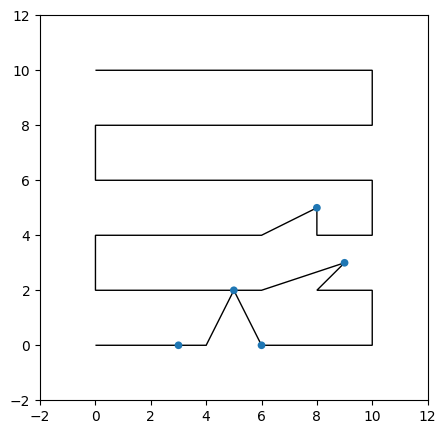

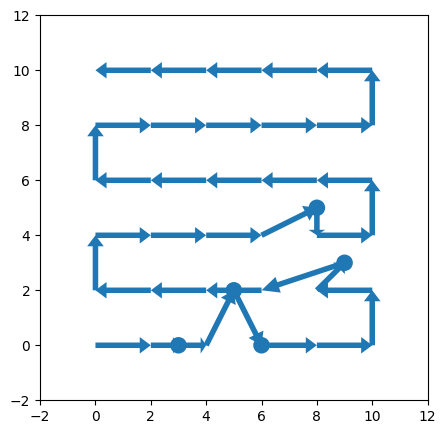

In [3]:
control_points = np.array([(8, 5), (9, 3), (5, 2), (3,0),(6,0)])
path= generate_lawnmower_with_control_points_v1(x_min=0, x_max=9, x_step=2, y_min=0, y_max=9, y_step=2, control_points = control_points, coverage_distance = 1)
visualize_path_and_control_points(path, control_points)
visualize_arrowpath_and_control_points(path, control_points)

### Lotzi Bölöni's lawnmower code from September 2022

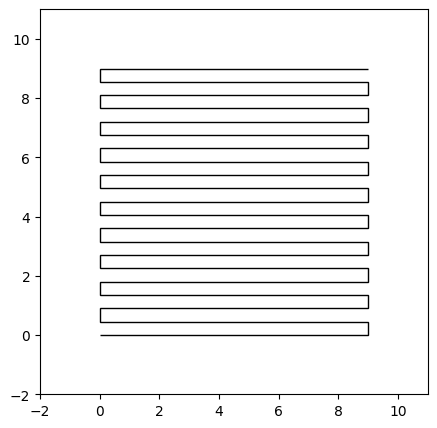

<Axes: >

In [4]:
path= generate_lawnmower(x_min=0, x_max=9, y_min=0, y_max=9, winds = 10)
visualize_path_and_control_points(path, [])

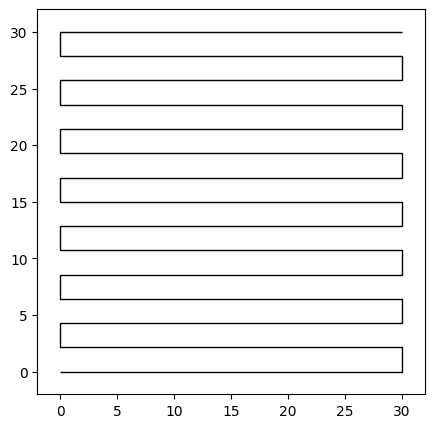

<Axes: >

In [5]:
path = find_fixed_budget_lawnmower([0, 0], x_min=0, x_max=30, y_min=0, y_max=30, velocity=1,  time=500)
visualize_path_and_control_points(path, [])

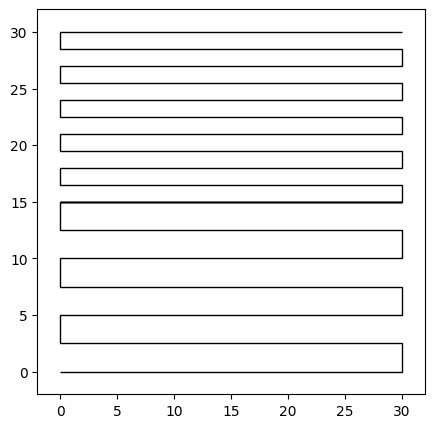

<Axes: >

In [6]:
time = 500
time_strawberry = time // 3
time_tomato = time - time_strawberry
path1 = find_fixed_budget_lawnmower([0, 0], x_min=0, x_max=30, y_min=0, y_max=15, velocity=1,  time=time_strawberry)
path2 = find_fixed_budget_lawnmower(path1[-1], x_min=0, x_max=30, y_min=15, y_max=30, velocity=1,  time=time_tomato)
path = np.append(path1, path2, axis=0)
# print(path)
visualize_path_and_control_points(path, [])

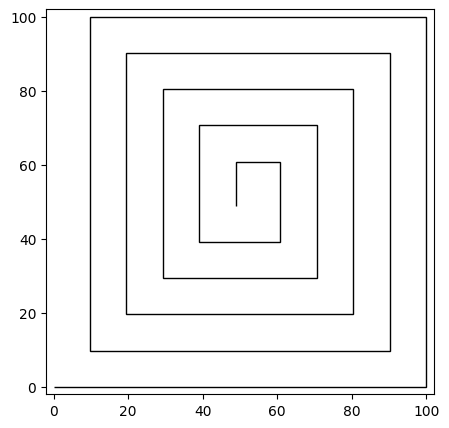

<Axes: >

In [7]:
def find_fixed_budget_spiral_v(starting_point, x_min, x_max, y_min, y_max, velocity, time):    
    """Finds a spiral pattern that best covers the area given a certain budget of time and velocity by performing a binary search on the number of winds. Returns the path"""
    step_max = 1000.0
    step_min = 1.0
    distancebudget = velocity * time
    while step_max > step_min + 1:
        step_test = (step_min + step_max) / 2
        print(step_test)
        path = generate_spiral_path(x_min, x_max, y_min, y_max, step = step_test)
        length = get_path_length(starting_point, path)
        if length > distancebudget:
            step_min = step_test
        else:
            step_max = step_test
    return path

#path = generate_spiral_path(0, 100, 0, 100, step=100)
# path = generate_spiral_path(0, 100, 0, 100, step=3.0)
path = find_fixed_budget_spiral([0,0], 0, 100, 0, 100, 1.0, 1000.0)
# print(path)
visualize_path_and_control_points(path, [])

### Sam Matloob's newer code
Lotzi: I think that this is again does something weird, it seems to go back for the control point...

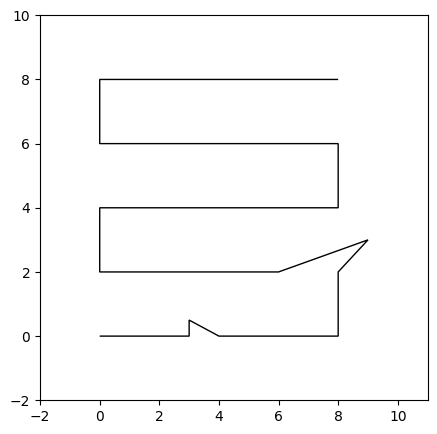

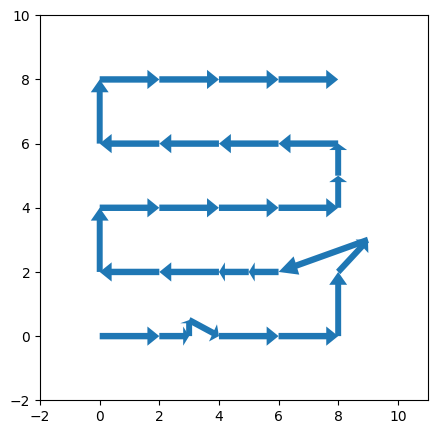

In [8]:

test1= generate_lawnmower_path_v2(0, 9, 2, 0, 9, 2)
control_points = np.array([[8, 5], [9, 3], [5, 2], [3,0],[6,0], [3,0.5]])
test2= add_control_points_v2(test1, control_points)
path = np.array(test2)
visualize_path_and_control_points(path, [])
visualize_arrowpath_and_control_points(path, [])

### The code for the spiral implementation by Partha Datta

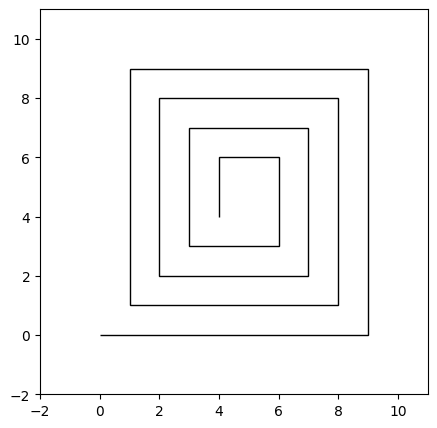

<Axes: >

In [9]:
path = generate_spiral_path(x_max = 9, y_max = 9, x_min = 0, y_min = 0)
path = np.array(path)
visualize_path_and_control_points(path, [])


### The code from PathGeneratorsIrregular

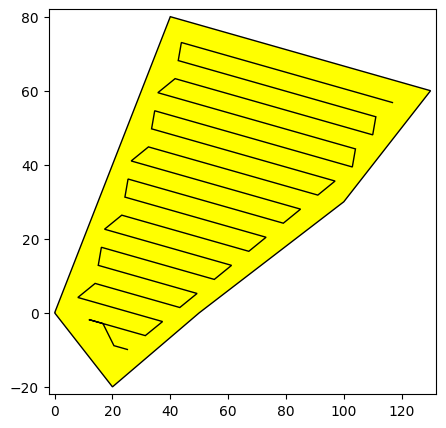

<Axes: >

In [10]:
ox = [0.0, 20.0, 50.0, 100.0, 130.0, 40.0, 0.0]
oy = [0.0, -20.0, 0.0, 30.0, 60.0, 80.0, 0.0]
resolution = 5.0 # was 5.0
px, py = planning(ox, oy, resolution, [])
path = np.array(list(zip(px, py)))
area = np.array(list(zip(ox,oy)))
visualize_path_and_control_points(path, [], area)


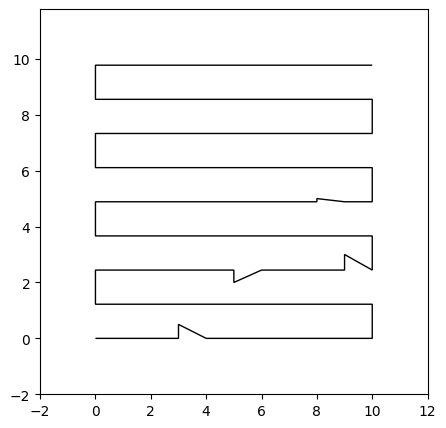

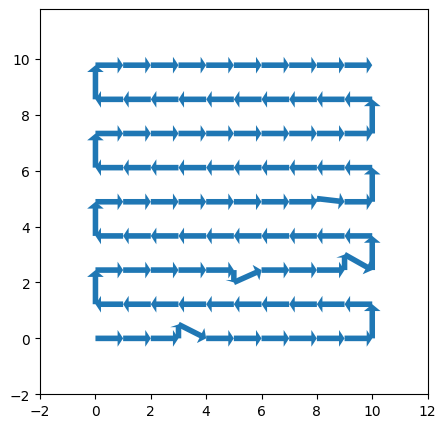

In [11]:
control_points = np.array([[8, 5], [9, 3], [5, 2], [3,0],[6,0], [3,0.5]])
path = find_fixed_budget_lawnmower_v2(control_points, (0, 0), 0, 10, 0, 10, 0.2, 500)
visualize_path_and_control_points(path, [])
visualize_arrowpath_and_control_points(path, [])